## Problem statement
Sentiment analysis is the classification of a customer’s reviews or comments as positive, negative, and sometimes neutral also. Most businesses analyze their customers’ feelings about their products or services to find out what their customers want from them. Google play store has millions of apps with their reviews, so it will be a good use case of sentiment analysis to analyze the sentiment of apps available on the google play store.

## Data
Google Play Store can be found on all Android smartphones and tablets. This is the official Google app store for the Android operating system. It has millions of apps with their reviews so that we can use such an amount of data for any data science task. Analyzing a customer’s reviews and comments is what we do in the Sentiment Analysis project.The dataset I am using in this project can be downloaded from here.https://github.com/amankharwal/Website-data/raw/master/user_reviews.csv

## Importing the necessary libraries

In [1]:
from itertools import count
from nltk.util import pr
import pandas as pd

## Loading data

In [2]:
data = pd.read_csv("/content/drive/MyDrive/filename/user_reviews.csv")
data.head()


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


Before moving forward, let’s have a look at whether this dataset contains any missing values or not:

In [3]:
data.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

So it has some null values, I will create a new dataset by dropping the null values:

In [4]:
data = data.dropna()
print(data.isnull().sum())

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64


Now to analyze the sentiments of the google play store reviews, I will add three new columns in the dataset by understanding the sentiments of each customer review as Positive, Negative, and Neutral:

In [8]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

def calculate_sentiment_scores(value):
    if isinstance(value, str):
        return sentiments.polarity_scores(value)
    else:
        return None

data["Sentiment_Scores"] = data["Translated_Review"].apply(calculate_sentiment_scores)

def extract_sentiment_scores(row):
    if row["Sentiment_Scores"] is not None:
        row["Positive"] = row["Sentiment_Scores"]["pos"]
        row["Negative"] = row["Sentiment_Scores"]["neg"]
        row["Neutral"] = row["Sentiment_Scores"]["neu"]
    return row

data = data.apply(extract_sentiment_scores, axis=1)
print(data.head())


                     App  Negative  Neutral  Positive Sentiment  \
0  10 Best Foods for You       0.0    0.466     0.534  Positive   
1  10 Best Foods for You       0.0    0.481     0.519  Positive   
2  10 Best Foods for You       NaN      NaN       NaN       NaN   
3  10 Best Foods for You       0.0    0.549     0.451  Positive   
4  10 Best Foods for You       0.0    0.323     0.677  Positive   

   Sentiment_Polarity                                   Sentiment_Scores  \
0                1.00  {'neg': 0.0, 'neu': 0.466, 'pos': 0.534, 'comp...   
1                0.25  {'neg': 0.0, 'neu': 0.481, 'pos': 0.519, 'comp...   
2                 NaN                                               None   
3                0.40  {'neg': 0.0, 'neu': 0.549, 'pos': 0.451, 'comp...   
4                1.00  {'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'comp...   

   Sentiment_Subjectivity                                  Translated_Review  
0                0.533333  I like eat delicious food. That's 

let’s have a look at the sentiments of customers about the applications available at the Google play store by using a scatter plot:

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


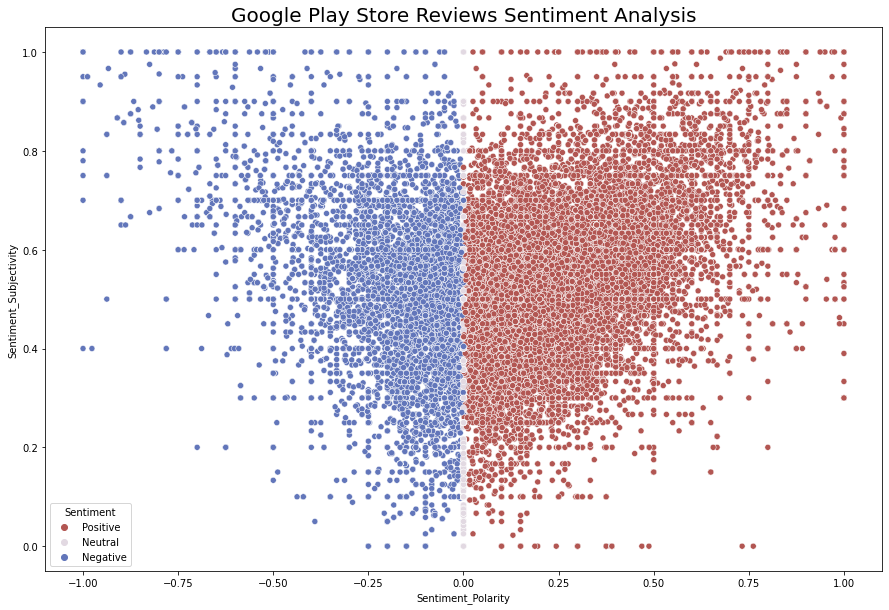

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 10))
sns.scatterplot(data['Sentiment_Polarity'], data['Sentiment_Subjectivity'], 
                hue = data['Sentiment'], edgecolor='white', palette="twilight_shifted_r")
plt.title("Google Play Store Reviews Sentiment Analysis", fontsize=20)
plt.show()

According to the scatter graph we can observe that the are more positive sentiments as compared to the negative ones.
